# Working With Dates in Python

### by Jo Guldi and Steph Buongiorno, with help from half-dozen datetime and matplotlib tutorials found in various places around the Web

    There are many reasons why a data scientist might want to understand change over time: for instance, to answer the historical question, what changed in how Congress talked over a short period of time?  Answering that question implies using word count over time. 
    
    Python treats dates (Jan 1 2020) as a discrete kind of data.  Some basic guidance can make it much easier to work with dates.  The datetime package is extremely useful for processing data. The first exercises below will lead us towards two questions:
    * How do we work with the datetime package to format dates?
    * How should we represent time on a graph to make it legible?
    
     Next, we will measure wordcounts of Congressional speeches by month and by year.  Counting by period requires the data scientist to "group" data by another variable, either by using the groupby() command or by using a for loop.  This notebook will demonstrate both systems.
     
     Finally, this notebook glances at an important question: normalizing statistics about time.  If we're measuring data from 2008 and 2010, and Congress spoke twice as much in 2010, raw word count won't really help us to understand what changed.  It would be far more useful to take the proportion of overall speech represented by each word.  A final exercise will lead us through the operation of normalizing wordcount as a proportion, which is crucial to working with words over time.

In [ ]:
# These lines may be useful.
# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix --user {sys.prefix} datetime

In [ ]:
import datetime
import pandas as pd
import numpy as np

In [ ]:
# First we make a dummy data set of names and birthdays
raw_data = {'name': ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel', 'Donna Faye', 'Alexander McQueen', 'Harold Bistander', 'Henrietta Morgan'],
'favorite_color': ['blue', 'red', 'yellow', 'green', 'pink', 'purple', 'olive', 'black'],
'grade': [88, 92, 95, 70, 75, 70, 80, 90],
'birth_date': ['01-02-1996', '08-05-1997', '04-28-1996', '12-16-1995', '07-01-1976', '08-03-1964', '02-22-2001', '03-28-1970']}
df = pd.DataFrame(raw_data, index = ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel', 'Donna Faye', 'Alexander McQueen', 'Harold Bistander', 'Henrietta Morgan'])
df

,name,favorite_color,grade,birth_date
Willard Morris,Willard Morris,blue,88,01-02-1996
Al Jennings,Al Jennings,red,92,08-05-1997
Omar Mullins,Omar Mullins,yellow,95,04-28-1996
Spencer McDaniel,Spencer McDaniel,green,70,12-16-1995
Donna Faye,Donna Faye,pink,75,07-01-1976
Alexander McQueen,Alexander McQueen,purple,70,08-03-1964
Harold Bistander,Harold Bistander,olive,80,02-22-2001
Henrietta Morgan,Henrietta Morgan,black,90,03-28-1970


The package _datetime_ offers an efficient way to extract year from string format data.

In [ ]:
df['year'] = pd.DatetimeIndex(df['birth_date']).year
df.head()

,name,favorite_color,grade,birth_date,year
Willard Morris,Willard Morris,blue,88,01-02-1996,1996
Al Jennings,Al Jennings,red,92,08-05-1997,1997
Omar Mullins,Omar Mullins,yellow,95,04-28-1996,1996
Spencer McDaniel,Spencer McDaniel,green,70,12-16-1995,1995
Donna Faye,Donna Faye,pink,75,07-01-1976,1976


Using _datetime_ , you can also extract just the month.

In [ ]:
df['month'] = pd.DatetimeIndex(df['birth_date']).month
df.head()

,name,favorite_color,grade,birth_date,year,month
Willard Morris,Willard Morris,blue,88,01-02-1996,1996,1
Al Jennings,Al Jennings,red,92,08-05-1997,1997,8
Omar Mullins,Omar Mullins,yellow,95,04-28-1996,1996,4
Spencer McDaniel,Spencer McDaniel,green,70,12-16-1995,1995,12
Donna Faye,Donna Faye,pink,75,07-01-1976,1976,7


We can also extract the day/month/year using the to_period function where 'D', 'M', 'Y' are inputs

In [ ]:
df['month_year'] = pd.to_datetime(df['birth_date']).dt.to_period('M')
df.head()

,name,favorite_color,grade,birth_date,year,month,month_year
Willard Morris,Willard Morris,blue,88,01-02-1996,1996,1,1996-01
Al Jennings,Al Jennings,red,92,08-05-1997,1997,8,1997-08
Omar Mullins,Omar Mullins,yellow,95,04-28-1996,1996,4,1996-04
Spencer McDaniel,Spencer McDaniel,green,70,12-16-1995,1995,12,1995-12
Donna Faye,Donna Faye,pink,75,07-01-1976,1976,7,1976-07


This could be important if you have -- for instance in Reddit -- timestamps with the hour that you want to round to the day or the month.

Extracting the decade from the year doesn't require _datetime_ -- it just requires a little math. 

In [ ]:
#add a column for the decade
df['decade'] = np.floor(df['year'] / 10) * 10 # round each year to the nearest ten -- by dividing by ten and "flooring" to the lowest integer
# df['decade'] = df[year]%10==0 # another way "floor" the date -- use the modulus ("%") to only admit numbers "floored" to the nearest ten.
df['decade'] = df['decade'].astype(int) # treat it like an integer, not a decimal
df

,name,favorite_color,grade,birth_date,year,month,month_year,decade
Willard Morris,Willard Morris,blue,88,01-02-1996,1996,1,1996-01,1990
Al Jennings,Al Jennings,red,92,08-05-1997,1997,8,1997-08,1990
Omar Mullins,Omar Mullins,yellow,95,04-28-1996,1996,4,1996-04,1990
Spencer McDaniel,Spencer McDaniel,green,70,12-16-1995,1995,12,1995-12,1990
Donna Faye,Donna Faye,pink,75,07-01-1976,1976,7,1976-07,1970
Alexander McQueen,Alexander McQueen,purple,70,08-03-1964,1964,8,1964-08,1960
Harold Bistander,Harold Bistander,olive,80,02-22-2001,2001,2,2001-02,2000
Henrietta Morgan,Henrietta Morgan,black,90,03-28-1970,1970,3,1970-03,1970


Kindly notice that in the code block above, there are two ways of "flooring" the year to the decade to which it belongs.  "Flooring" is different from "rounding." 

In [ ]:
np.floor(1976/10)*10

1970.0

In [ ]:
np.round(1976/10)*10

1980.0

When we're working with dates, we have the convention of referring to 1976 as part of the 1970s, not the 1980s.  "Flooring" describes the math involved -- it looks down for the nearest integer floor, rather than both up and down for the nearest number.  All you really need to know is that you should be flooring rather than rounding in the case of months or decades, so that your dates make sense to an outside interpreter.  Otherwise, you might produce an analysis and show your data, only to have a quizzical response from a historian that asks you with 1976 counts as part of the 1980s, and what your evidence of change in the 1970s really means.

The two kinds of "flooring" above are dividing and discarding the decimal (np.floor(1976/10)*10) and using the modulus to discard the decimal (df[year]%10==0).  The latter is shorter, and uses the % operator, which essentially just discards the decimal.  They do the same thing.  Again, all you need to know for our purposes is that you should be flooring, not rounding, when you work with dates.

## Visualizing with dates

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

Visualizing data with dates in python requires a few tricks. There are only a few major things to know:
* Conventions of visualization dictate that time be treated on the x axis, with the years in order.
* When you have rounded dates, you want to make sure that the axis labels correspond to the quantities to which you have rounded them.
* Because some conventions of listing dates put the month first, if you're working with full dates rather than with years, you need to make sure that Python knows how to "order" the dates.

Let's take the first one first.  _Put time on the x axis._  Here's what happens if you aren't careful.

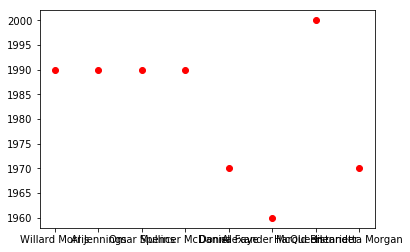

In [ ]:
%matplotlib inline
plt.scatter(df.name, df.decade, color='red')
plt.show()

You might notice that a few things are wrong here.  Matplotlib has generated labels for us -- but they're very hard to read.  But that's not the only trouble. 

You might observe that your tendency is to try to read this chart from left to right, like text.  In which case it looks like first there were four people born at the same time, followed by a dearth of births and a rise in births.  This interpretation is totally wrong for several reasons: first, change over time goes from the bottom up; second, this is a scatterplot of names and dates, not a graph representing quantities.  But it's easy to be fooled about how to read change over time in a graph -- if you're not paying attention to your axes. 

Let's rotate the axes now and see how much easier it is to read.

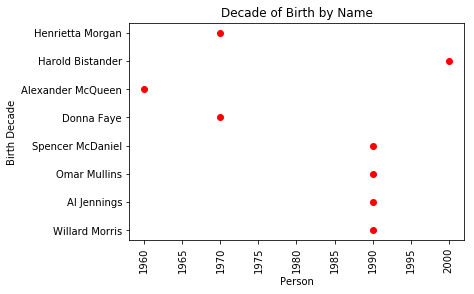

In [ ]:
%matplotlib inline
plt.scatter(df.decade, df.name, color='red') # notice that we've switched the order so that decade is plotted on the x axis
plt.xticks(rotation=90) # puts the labels at a 90 angle so that they fit
plt.ylabel("Birth Decade") # don't forget to label the axes
plt.xlabel("Person")
plt.title("Decade of Birth by Name") # and label the plot!
plt.show()

That's much better.  You can read the chart from left to right, noticing that four people were born in 1990.

However, there's still a problem.  Look at the labels on the x-axis.  Notice that no one is listed as having been born near 1975, even though we have a birthdate in 1976.  

The problem is that the axis labels don't fit our data.  The x-axis doesn't seem to recognize that we're dealing with decades! Let's fix that so that our readers aren't confused about what the plot is showing.

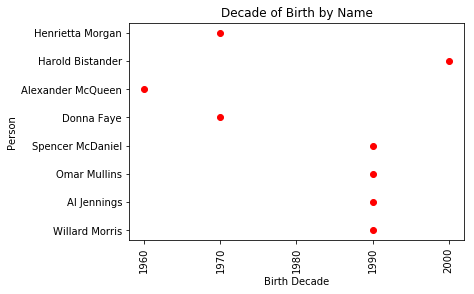

In [ ]:
%matplotlib inline

# tell it where to put the ticks only every 10 years
xt = np.arange(df.decade.min(), df.decade.max()+1) # we create a dummy list of each decade
xt = xt[xt%10==0] # we use the modulus ("%") to only admit numbers "floored" to the nearest ten.
# xt will be fed to the visualization as a list of ticks for the x-axis.

#plt.style.use('ggplot')
plt.scatter(df.decade, df.name, color='red')
plt.xlabel("Birth Decade")
plt.ylabel("Person")
plt.xticks(rotation=90)
plt.xticks(xt) # this line of code tells the plot to put axes only on the list of number in xt -- that is, whole decade numbers
plt.title("Decade of Birth by Name")
plt.show()

By generating a list of decades in the variable xt, we can tell matplotlib to only put axis marks on the decades listed in xt.  The visualization makes a lot more sense -- a naive reader could guess that we're just plotting decades, because there aren't any extra x-axis years to suggest zero birthdays in between.

Now let's try plotting birth dates -- which have, as you'll remember, information about month, day, and year in them.

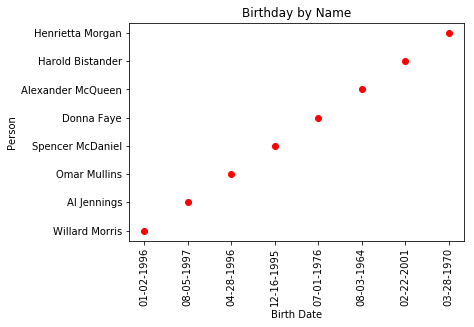

In [ ]:
%matplotlib inline

plt.scatter(df.birth_date, df.name, color='red')
plt.xlabel("Birth Date")
plt.ylabel("Person")
plt.xticks(rotation=90)
#plt.xticks(xt)
plt.title("Birthday by Name")
plt.show()

Looks great!  -- but hey, wait a minute; 1964 doesn't come after 1996... It's putting the dates in the order in which they were arranged, randomly, when we entered the data.  The plot must be treating everything in the birth_date column like it's a string.  That's not very useful; it doesn't tell us anything about time.

Let's try adding a few lines of code to tell pandas to "sort" the values of birth_date from small to large, treating each value like a date.

/hpc/applications/anaconda/3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


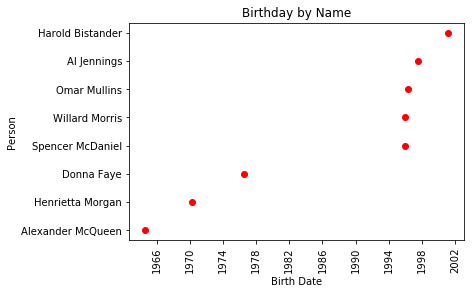

In [ ]:
%matplotlib inline

# this time, before we plot, let's ask pandas to sort the values
df.birth_date = pd.to_datetime(df.birth_date) # instructs pandas to treat birth_date like a date
df = df.sort_values('birth_date', ascending=True) # re-sorts the df by date

plt.scatter(df.birth_date, df.name, color='red')
plt.xlabel("Birth Date")
plt.ylabel("Person")
plt.xticks(rotation=90)

#plt.xticks(xt)
plt.title("Birthday by Name")
plt.show()


Compare this graph with the graph above of Name by Decade.  What's the difference between the two?  When might one format be more useful?

# Measuring Change Over Time by Grouping

      When working with temporal data, we often want to understand the meaning of some variable -- for instance year or decade.  Understanding often implies using that variable to count other variables, for example: how many times do words appear in each decade?  Which words change over time?
    
       In this exercise, we will use two strategies to understand wordcount by period: one is the groupby() command, and the other (which you have seen before) is the "for" loop.  The two essentially do the same thing, but they are used in Python in slightly different contexts.

# The pandas `groupby()` method

Understanding how to group data is essential for performing a number of operations on pandas DataFrames. 

Groupby refers to a process involving one or more of the following steps: 
 - splitting the data into groups based on some criteria.
 - applying a function to each group independently.
 - combining the results into a data structure. 

The main takeaway is that with `groupby()` we can group categories and then apply functions to the categories instead of to the entire data set.

Before showing code examples of `groupby()` let's get a quick conceptual overview of what it means to perform a function to a category as opposed to the entire data set.

Consider the following image, a sample of the Hansard data. If we were to group this data by decade it would be as though we stuck each decade into a bucket to be operated upon independantly from the rest of the data.

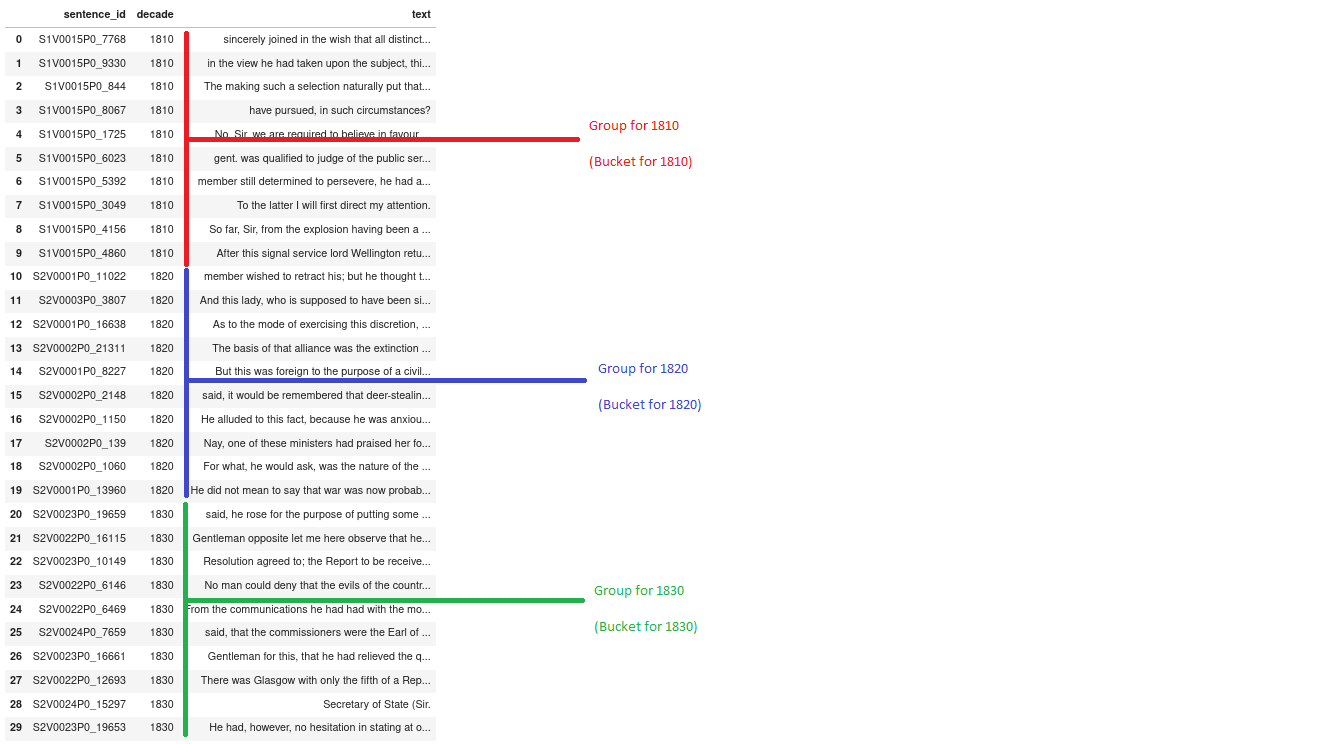

The following code example demonstrates this concept in action. During this example we will:

1. Count the number of words in each sentence of our Hansard sample
2. Group the data by decade
3. Sum the total number of words per each decade based on our sentence-level word counts

### Code example:

The code below is the basic code to load debates from the Stanford database of American Congressional debates.  It takes speeches in one dataframe, and "descriptions" of the speeches (who spoke and when) in another dataframe, and then merges them into one database.

Depending on how the Max and Min Threshold are set, you can ingest more speeches or fewer ones.  If you ingest too many speeches at once, you might crash the computer; but if you're working on an HPC machine, you can always restart the session with more memory and try the exercise again.

In [ ]:
import pandas as pd
import csv
import glob

all_speech_files = glob.glob('/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_*.txt')
CONGRESS_MIN_THRESHOLD = 100
CONGRESS_MAX_THRESHOLD = 115

speech_files = []

for fn in all_speech_files:
    number = int(fn.rsplit('_', 1)[-1].split('.')[0])
    if CONGRESS_MIN_THRESHOLD <= number <= CONGRESS_MAX_THRESHOLD:
        speech_files.append(fn)
        speech_files.sort()
        display(speech_files)
        
def parse_one(fn):
    print(f'Reading {fn}...')
    return pd.read_csv(fn, sep='|', encoding="ISO-8859-1", error_bad_lines=False, quoting=csv.QUOTE_NONE)

speeches_df = pd.concat((parse_one(fn) for fn in speech_files))
display(speeches_df)


['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_111.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_111.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_111.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_111.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_111.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_111.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_111.txt']

['/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_111.txt']

Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt...


b'Skipping line 31528: expected 2 fields, saw 3\nSkipping line 37946: expected 2 fields, saw 3\nSkipping line 188164: expected 2 fields, saw 3\nSkipping line 232184: expected 2 fields, saw 3\n'
b'Skipping line 274343: expected 2 fields, saw 5\n'


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt...


b'Skipping line 3868: expected 2 fields, saw 3\nSkipping line 4170: expected 2 fields, saw 3\nSkipping line 24283: expected 2 fields, saw 3\nSkipping line 35613: expected 2 fields, saw 3\nSkipping line 35704: expected 2 fields, saw 3\nSkipping line 57443: expected 2 fields, saw 3\nSkipping line 95845: expected 2 fields, saw 3\nSkipping line 147639: expected 2 fields, saw 3\nSkipping line 203930: expected 2 fields, saw 3\nSkipping line 205059: expected 2 fields, saw 3\n'


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt...


b'Skipping line 24820: expected 2 fields, saw 3\nSkipping line 26339: expected 2 fields, saw 3\nSkipping line 73177: expected 2 fields, saw 3\nSkipping line 76342: expected 2 fields, saw 3\nSkipping line 128313: expected 2 fields, saw 3\nSkipping line 128705: expected 2 fields, saw 3\nSkipping line 139864: expected 2 fields, saw 3\nSkipping line 151770: expected 2 fields, saw 3\nSkipping line 158265: expected 2 fields, saw 3\nSkipping line 179429: expected 2 fields, saw 4\nSkipping line 179956: expected 2 fields, saw 3\nSkipping line 180140: expected 2 fields, saw 3\nSkipping line 180498: expected 2 fields, saw 3\nSkipping line 180706: expected 2 fields, saw 3\nSkipping line 181071: expected 2 fields, saw 3\nSkipping line 181077: expected 2 fields, saw 3\nSkipping line 181570: expected 2 fields, saw 3\nSkipping line 182753: expected 2 fields, saw 3\nSkipping line 196608: expected 2 fields, saw 3\nSkipping line 202342: expected 2 fields, saw 3\nSkipping line 218154: expected 2 fields, s

Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt...


b'Skipping line 9074: expected 2 fields, saw 3\nSkipping line 9527: expected 2 fields, saw 3\nSkipping line 14411: expected 2 fields, saw 3\nSkipping line 14448: expected 2 fields, saw 4\nSkipping line 14489: expected 2 fields, saw 5\nSkipping line 14597: expected 2 fields, saw 3\nSkipping line 14613: expected 2 fields, saw 3\nSkipping line 14707: expected 2 fields, saw 3\nSkipping line 14761: expected 2 fields, saw 4\nSkipping line 14776: expected 2 fields, saw 3\nSkipping line 14790: expected 2 fields, saw 3\nSkipping line 14832: expected 2 fields, saw 3\nSkipping line 14908: expected 2 fields, saw 3\nSkipping line 14968: expected 2 fields, saw 3\nSkipping line 15014: expected 2 fields, saw 3\nSkipping line 33022: expected 2 fields, saw 3\nSkipping line 34717: expected 2 fields, saw 4\nSkipping line 52845: expected 2 fields, saw 3\nSkipping line 74571: expected 2 fields, saw 5\nSkipping line 81916: expected 2 fields, saw 3\nSkipping line 96604: expected 2 fields, saw 3\nSkipping line

Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt...


b'Skipping line 897: expected 2 fields, saw 3\nSkipping line 974: expected 2 fields, saw 5\nSkipping line 6487: expected 2 fields, saw 3\nSkipping line 8299: expected 2 fields, saw 3\nSkipping line 10159: expected 2 fields, saw 3\nSkipping line 11440: expected 2 fields, saw 3\nSkipping line 22453: expected 2 fields, saw 3\nSkipping line 32193: expected 2 fields, saw 3\nSkipping line 33909: expected 2 fields, saw 3\nSkipping line 38214: expected 2 fields, saw 3\nSkipping line 60085: expected 2 fields, saw 3\nSkipping line 60561: expected 2 fields, saw 3\nSkipping line 60770: expected 2 fields, saw 3\nSkipping line 69949: expected 2 fields, saw 3\nSkipping line 80628: expected 2 fields, saw 3\nSkipping line 92552: expected 2 fields, saw 3\nSkipping line 100552: expected 2 fields, saw 3\nSkipping line 110683: expected 2 fields, saw 3\nSkipping line 114532: expected 2 fields, saw 3\nSkipping line 115534: expected 2 fields, saw 3\nSkipping line 142076: expected 2 fields, saw 3\nSkipping lin

Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_105.txt...


b'Skipping line 11900: expected 2 fields, saw 3\nSkipping line 19254: expected 2 fields, saw 3\nSkipping line 19485: expected 2 fields, saw 3\nSkipping line 20125: expected 2 fields, saw 3\nSkipping line 21268: expected 2 fields, saw 3\nSkipping line 22339: expected 2 fields, saw 3\nSkipping line 22469: expected 2 fields, saw 3\nSkipping line 22696: expected 2 fields, saw 3\nSkipping line 25549: expected 2 fields, saw 3\nSkipping line 25966: expected 2 fields, saw 3\nSkipping line 26524: expected 2 fields, saw 3\nSkipping line 27100: expected 2 fields, saw 3\nSkipping line 27718: expected 2 fields, saw 3\nSkipping line 28618: expected 2 fields, saw 3\nSkipping line 29339: expected 2 fields, saw 3\nSkipping line 29352: expected 2 fields, saw 3\nSkipping line 29453: expected 2 fields, saw 3\nSkipping line 29982: expected 2 fields, saw 3\nSkipping line 30021: expected 2 fields, saw 3\nSkipping line 30399: expected 2 fields, saw 4\nSkipping line 30574: expected 2 fields, saw 3\nSkipping li

Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt...


b'Skipping line 57289: expected 2 fields, saw 3\nSkipping line 60260: expected 2 fields, saw 3\nSkipping line 128248: expected 2 fields, saw 3\n'


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt...


b'Skipping line 88571: expected 2 fields, saw 3\n'


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt...


b'Skipping line 10301: expected 2 fields, saw 3\nSkipping line 119600: expected 2 fields, saw 3\nSkipping line 154253: expected 2 fields, saw 3\nSkipping line 164746: expected 2 fields, saw 3\nSkipping line 167621: expected 2 fields, saw 3\nSkipping line 170016: expected 2 fields, saw 3\n'


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_111.txt...


b'Skipping line 55163: expected 2 fields, saw 3\n'


,speech_id,speech
0,1000000001,Representativeselect to the 100th Congress. th...
1,1000000002,The Chair would also like to state that Repres...
2,1000000003,The quor closes that 426 Represe have answered...
3,1000000004,The Clerk credentials regular in for received ...
4,1000000005,The next order of business is the election of ...
...,...,...
179262,1110179264,Madam Speaker. on rollcall Nos. 662 and 661. I...
179263,1110179265,Madam Speaker. as I leave Congress as the peop...
179264,1110179266,Madam Speaker. on rolicall No. 658. I was unav...
179265,1110179267,Madam Speaker. on rollcall No. 658 my flight w...


In [ ]:
all_description_files = glob.glob('/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_*.txt')
                                  
description_files = []

for fn in all_description_files:
    number = int(fn.rsplit('_', 1)[-1].split('.')[0])
    if CONGRESS_MIN_THRESHOLD <= number <= CONGRESS_MAX_THRESHOLD:
        speech_files.append(fn)
        speech_files.sort()
        display(speech_files)
        
description_df = pd.concat((parse_one(fn) for fn in speech_files))
display(description_df)

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt',
 '/scra

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt',
 '/scratch

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt',
 '/scratch/gr

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt',
 '/scratch/group

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt',
 '/scratch/group/oi

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_105.txt',
 '/scratch/group/oit_r

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt',
 '/scratch/group/oit_rese

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt',
 '/scratch/group/oit_researc

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt',
 '/scratch/group/oit_research_d

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt',
 '/scratch/group/oit_research_data

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_100.txt',
 '/scratch/group/oit_research_data/st

['/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_100.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_101.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_102.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_103.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_104.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_105.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_106.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_108.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_110.txt',
 '/scratch/group/oit_research_data/stanford_congress/hein-bound/descr_111.txt',
 '/scratch/group/oit_research_data/stanf

Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_100.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_101.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_102.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_103.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_104.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_105.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_106.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_107.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_108.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_109.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/descr_110.txt...
Reading /scratch/group/oit_research_data/st

b'Skipping line 31528: expected 2 fields, saw 3\nSkipping line 37946: expected 2 fields, saw 3\nSkipping line 188164: expected 2 fields, saw 3\nSkipping line 232184: expected 2 fields, saw 3\n'
b'Skipping line 274343: expected 2 fields, saw 5\n'


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_101.txt...


b'Skipping line 3868: expected 2 fields, saw 3\nSkipping line 4170: expected 2 fields, saw 3\nSkipping line 24283: expected 2 fields, saw 3\nSkipping line 35613: expected 2 fields, saw 3\nSkipping line 35704: expected 2 fields, saw 3\nSkipping line 57443: expected 2 fields, saw 3\nSkipping line 95845: expected 2 fields, saw 3\nSkipping line 147639: expected 2 fields, saw 3\nSkipping line 203930: expected 2 fields, saw 3\nSkipping line 205059: expected 2 fields, saw 3\n'


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_102.txt...


b'Skipping line 24820: expected 2 fields, saw 3\nSkipping line 26339: expected 2 fields, saw 3\nSkipping line 73177: expected 2 fields, saw 3\nSkipping line 76342: expected 2 fields, saw 3\nSkipping line 128313: expected 2 fields, saw 3\nSkipping line 128705: expected 2 fields, saw 3\nSkipping line 139864: expected 2 fields, saw 3\nSkipping line 151770: expected 2 fields, saw 3\nSkipping line 158265: expected 2 fields, saw 3\nSkipping line 179429: expected 2 fields, saw 4\nSkipping line 179956: expected 2 fields, saw 3\nSkipping line 180140: expected 2 fields, saw 3\nSkipping line 180498: expected 2 fields, saw 3\nSkipping line 180706: expected 2 fields, saw 3\nSkipping line 181071: expected 2 fields, saw 3\nSkipping line 181077: expected 2 fields, saw 3\nSkipping line 181570: expected 2 fields, saw 3\nSkipping line 182753: expected 2 fields, saw 3\nSkipping line 196608: expected 2 fields, saw 3\nSkipping line 202342: expected 2 fields, saw 3\nSkipping line 218154: expected 2 fields, s

Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_103.txt...


b'Skipping line 9074: expected 2 fields, saw 3\nSkipping line 9527: expected 2 fields, saw 3\nSkipping line 14411: expected 2 fields, saw 3\nSkipping line 14448: expected 2 fields, saw 4\nSkipping line 14489: expected 2 fields, saw 5\nSkipping line 14597: expected 2 fields, saw 3\nSkipping line 14613: expected 2 fields, saw 3\nSkipping line 14707: expected 2 fields, saw 3\nSkipping line 14761: expected 2 fields, saw 4\nSkipping line 14776: expected 2 fields, saw 3\nSkipping line 14790: expected 2 fields, saw 3\nSkipping line 14832: expected 2 fields, saw 3\nSkipping line 14908: expected 2 fields, saw 3\nSkipping line 14968: expected 2 fields, saw 3\nSkipping line 15014: expected 2 fields, saw 3\nSkipping line 33022: expected 2 fields, saw 3\nSkipping line 34717: expected 2 fields, saw 4\nSkipping line 52845: expected 2 fields, saw 3\nSkipping line 74571: expected 2 fields, saw 5\nSkipping line 81916: expected 2 fields, saw 3\nSkipping line 96604: expected 2 fields, saw 3\nSkipping line

Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_104.txt...


b'Skipping line 897: expected 2 fields, saw 3\nSkipping line 974: expected 2 fields, saw 5\nSkipping line 6487: expected 2 fields, saw 3\nSkipping line 8299: expected 2 fields, saw 3\nSkipping line 10159: expected 2 fields, saw 3\nSkipping line 11440: expected 2 fields, saw 3\nSkipping line 22453: expected 2 fields, saw 3\nSkipping line 32193: expected 2 fields, saw 3\nSkipping line 33909: expected 2 fields, saw 3\nSkipping line 38214: expected 2 fields, saw 3\nSkipping line 60085: expected 2 fields, saw 3\nSkipping line 60561: expected 2 fields, saw 3\nSkipping line 60770: expected 2 fields, saw 3\nSkipping line 69949: expected 2 fields, saw 3\nSkipping line 80628: expected 2 fields, saw 3\nSkipping line 92552: expected 2 fields, saw 3\nSkipping line 100552: expected 2 fields, saw 3\nSkipping line 110683: expected 2 fields, saw 3\nSkipping line 114532: expected 2 fields, saw 3\nSkipping line 115534: expected 2 fields, saw 3\nSkipping line 142076: expected 2 fields, saw 3\nSkipping lin

Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_105.txt...


b'Skipping line 11900: expected 2 fields, saw 3\nSkipping line 19254: expected 2 fields, saw 3\nSkipping line 19485: expected 2 fields, saw 3\nSkipping line 20125: expected 2 fields, saw 3\nSkipping line 21268: expected 2 fields, saw 3\nSkipping line 22339: expected 2 fields, saw 3\nSkipping line 22469: expected 2 fields, saw 3\nSkipping line 22696: expected 2 fields, saw 3\nSkipping line 25549: expected 2 fields, saw 3\nSkipping line 25966: expected 2 fields, saw 3\nSkipping line 26524: expected 2 fields, saw 3\nSkipping line 27100: expected 2 fields, saw 3\nSkipping line 27718: expected 2 fields, saw 3\nSkipping line 28618: expected 2 fields, saw 3\nSkipping line 29339: expected 2 fields, saw 3\nSkipping line 29352: expected 2 fields, saw 3\nSkipping line 29453: expected 2 fields, saw 3\nSkipping line 29982: expected 2 fields, saw 3\nSkipping line 30021: expected 2 fields, saw 3\nSkipping line 30399: expected 2 fields, saw 4\nSkipping line 30574: expected 2 fields, saw 3\nSkipping li

Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_106.txt...


b'Skipping line 57289: expected 2 fields, saw 3\nSkipping line 60260: expected 2 fields, saw 3\nSkipping line 128248: expected 2 fields, saw 3\n'


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_107.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_108.txt...


b'Skipping line 88571: expected 2 fields, saw 3\n'


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_109.txt...
Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_110.txt...


b'Skipping line 10301: expected 2 fields, saw 3\nSkipping line 119600: expected 2 fields, saw 3\nSkipping line 154253: expected 2 fields, saw 3\nSkipping line 164746: expected 2 fields, saw 3\nSkipping line 167621: expected 2 fields, saw 3\nSkipping line 170016: expected 2 fields, saw 3\n'


Reading /scratch/group/oit_research_data/stanford_congress/hein-bound/speeches_111.txt...


b'Skipping line 55163: expected 2 fields, saw 3\n'
/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


,chamber,char_count,date,file,first_name,gender,last_name,line_end,line_start,number_within_file,speaker,speech,speech_id,state,word_count
0,H,851.0,19870106.0,01061987.txt,Unknown,Special,Unknown,82.0,57.0,1.0,The CLERK,NaN,1000000001,Unknown,136.0
1,H,142.0,19870106.0,01061987.txt,Unknown,Special,Unknown,88.0,84.0,2.0,The CLERK,NaN,1000000002,Unknown,26.0
2,H,73.0,19870106.0,01061987.txt,Unknown,Special,Unknown,539.0,536.0,3.0,The CLERK,NaN,1000000003,Unknown,13.0
3,H,253.0,19870106.0,01061987.txt,Unknown,Special,Unknown,552.0,541.0,4.0,The CLERK,NaN,1000000004,Unknown,43.0
4,H,376.0,19870106.0,01061987.txt,Unknown,Special,Unknown,580.0,554.0,5.0,The CLERK,NaN,1000000005,Unknown,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madam Speaker. on rollcall Nos. 662 and 661. I...,1110179264,NaN,NaN
179263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madam Speaker. as I leave Congress as the peop...,1110179265,NaN,NaN
179264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madam Speaker. on rolicall No. 658. I was unav...,1110179266,NaN,NaN
179265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madam Speaker. on rollcall No. 658 my flight w...,1110179267,NaN,NaN


In [ ]:
del description_df['speech']  # remove the 'speech' column in descriptions because those look like special cases non-speeches

In [ ]:
all_data = pd.merge(speeches_df, description_df, on = 'speech_id').fillna(0)
all_data.head()

,speech_id,speech,chamber,char_count,date,file,first_name,gender,last_name,line_end,line_start,number_within_file,speaker,state,word_count
0,1000000001,Representativeselect to the 100th Congress. th...,H,851.0,19870106.0,01061987.txt,Unknown,Special,Unknown,82.0,57.0,1.0,The CLERK,Unknown,136.0
1,1000000001,Representativeselect to the 100th Congress. th...,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0.0
2,1000000002,The Chair would also like to state that Repres...,H,142.0,19870106.0,01061987.txt,Unknown,Special,Unknown,88.0,84.0,2.0,The CLERK,Unknown,26.0
3,1000000002,The Chair would also like to state that Repres...,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0.0
4,1000000003,The quor closes that 426 Represe have answered...,H,73.0,19870106.0,01061987.txt,Unknown,Special,Unknown,539.0,536.0,3.0,The CLERK,Unknown,13.0


The lines above merge the "speeches" and "descriptions" files so that we now have one database of speeches with the date on which they were spoken.

Now that we have the data in place, let's ask the data: when does it stop or start?

In [ ]:
max(all_data['date'])

20101222.0

The last date is listed above -- year first, then month, then day.

In [ ]:
min(all_data['date'])

0.0

Whoops, that's not right.  I bet there are some zeros in the date data for speeches that haven't been assigned a date.  Let's get rid of that data before it messes up our other counts!

In [ ]:
all_data = all_data[all_data.date != 0] # drop zeros in date

In [ ]:
min(all_data['date']) # better!

19870106.0

Use datetime to render the date column as recognizable dates

In [ ]:
all_data['date']=pd.to_datetime(all_data['date'],format='%Y%m%d')
all_data.head()

,speech_id,speech,chamber,char_count,date,file,first_name,gender,last_name,line_end,line_start,number_within_file,speaker,state,word_count
0,1000000001,Representativeselect to the 100th Congress. th...,H,851.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,82.0,57.0,1.0,The CLERK,Unknown,136.0
2,1000000002,The Chair would also like to state that Repres...,H,142.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,88.0,84.0,2.0,The CLERK,Unknown,26.0
4,1000000003,The quor closes that 426 Represe have answered...,H,73.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,539.0,536.0,3.0,The CLERK,Unknown,13.0
6,1000000004,The Clerk credentials regular in for received ...,H,253.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,552.0,541.0,4.0,The CLERK,Unknown,43.0
8,1000000005,The next order of business is the election of ...,H,376.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,580.0,554.0,5.0,The CLERK,Unknown,65.0


In [ ]:
all_data['year']=pd.DatetimeIndex(all_data['date']).year
all_data.head()

,speech_id,speech,chamber,char_count,date,file,first_name,gender,last_name,line_end,line_start,number_within_file,speaker,state,word_count,year
0,1000000001,Representativeselect to the 100th Congress. th...,H,851.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,82.0,57.0,1.0,The CLERK,Unknown,136.0,1987
2,1000000002,The Chair would also like to state that Repres...,H,142.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,88.0,84.0,2.0,The CLERK,Unknown,26.0,1987
4,1000000003,The quor closes that 426 Represe have answered...,H,73.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,539.0,536.0,3.0,The CLERK,Unknown,13.0,1987
6,1000000004,The Clerk credentials regular in for received ...,H,253.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,552.0,541.0,4.0,The CLERK,Unknown,43.0,1987
8,1000000005,The next order of business is the election of ...,H,376.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,580.0,554.0,5.0,The CLERK,Unknown,65.0,1987


In [ ]:
all_data['month']=pd.DatetimeIndex(all_data['date']).month
all_data.tail()

,speech_id,speech,chamber,char_count,date,file,first_name,gender,last_name,line_end,line_start,number_within_file,speaker,state,word_count,year,month
5286192,1110179264,Madam Speaker. on rollcall Nos. 662 and 661. I...,E,118.0,2010-12-22,12222010.txt,Unknown,F,GRANGER,52716.0,52713.0,699.0,Ms. GRANGER,Unknown,23.0,2010,12
5286194,1110179265,Madam Speaker. as I leave Congress as the peop...,E,1251.0,2010-12-22,12222010.txt,Unknown,F,KILPATRICK,52755.0,52723.0,700.0,Ms. KILPATRICK of Michigan,Michigan,221.0,2010,12
5286196,1110179266,Madam Speaker. on rolicall No. 658. I was unav...,E,109.0,2010-12-22,12222010.txt,Unknown,M,HELLER,52763.0,52761.0,701.0,Mr. HELLER,Unknown,19.0,2010,12
5286198,1110179267,Madam Speaker. on rollcall No. 658 my flight w...,E,121.0,2010-12-22,12222010.txt,Unknown,M,PAULSEN,52772.0,52769.0,702.0,Mr. PAULSEN,Unknown,23.0,2010,12
5286200,1110179268,Madam Speaker. I wold like to submit the follo...,E,2952.0,2010-12-22,12222010.txt,Unknown,M,HALL,52860.0,52779.0,703.0,Mr. HALL of New York,New York,446.0,2010,12


To count the number of words for each year, we can use `groupby()` followed by another method, `.sum()`. The process where we invoke one method after another is called "chaining."

In [ ]:
# create a period variable called month_year
all_data['month_year'] = pd.to_datetime(all_data['date']).dt.to_period('M')
all_data.head()

,speech_id,speech,chamber,char_count,date,file,first_name,gender,last_name,line_end,line_start,number_within_file,speaker,state,word_count,year,month,month_year
0,1000000001,Representativeselect to the 100th Congress. th...,H,851.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,82.0,57.0,1.0,The CLERK,Unknown,136.0,1987,1,1987-01
2,1000000002,The Chair would also like to state that Repres...,H,142.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,88.0,84.0,2.0,The CLERK,Unknown,26.0,1987,1,1987-01
4,1000000003,The quor closes that 426 Represe have answered...,H,73.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,539.0,536.0,3.0,The CLERK,Unknown,13.0,1987,1,1987-01
6,1000000004,The Clerk credentials regular in for received ...,H,253.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,552.0,541.0,4.0,The CLERK,Unknown,43.0,1987,1,1987-01
8,1000000005,The next order of business is the election of ...,H,376.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,580.0,554.0,5.0,The CLERK,Unknown,65.0,1987,1,1987-01


In [ ]:
# convert month-year back to date format for easier plotting later (this normalizes the field to a kind of date that matplotlib likes)
all_data['month_year'] =all_data.month_year.values.astype('datetime64[M]')
all_data.head()

,speech_id,speech,chamber,char_count,date,file,first_name,gender,last_name,line_end,line_start,number_within_file,speaker,state,word_count,year,month,month_year
0,1000000001,Representativeselect to the 100th Congress. th...,H,851.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,82.0,57.0,1.0,The CLERK,Unknown,136.0,1987,1,1987-01-01
2,1000000002,The Chair would also like to state that Repres...,H,142.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,88.0,84.0,2.0,The CLERK,Unknown,26.0,1987,1,1987-01-01
4,1000000003,The quor closes that 426 Represe have answered...,H,73.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,539.0,536.0,3.0,The CLERK,Unknown,13.0,1987,1,1987-01-01
6,1000000004,The Clerk credentials regular in for received ...,H,253.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,552.0,541.0,4.0,The CLERK,Unknown,43.0,1987,1,1987-01-01
8,1000000005,The next order of business is the election of ...,H,376.0,1987-01-06,01061987.txt,Unknown,Special,Unknown,580.0,554.0,5.0,The CLERK,Unknown,65.0,1987,1,1987-01-01


Now that we have a standardize month_year variable, we can ask the computer to group all words that were spoken in that month together and measure how many words, total, were spoken in that month.  

Notice the use of 'groupby'.

In [ ]:
#year_counts = all_data.groupby(['month_year']).sum() # notice the use of groupby!  
#year_counts = year_counts['word_count'] # we only need one column
#year_counts

year_counts = all_data.groupby(['month_year']).sum().copy() # Steph added `.copy`: ditto below 

year_counts

,speech_id,char_count,line_end,line_start,number_within_file,word_count,year,month
month_year,,,,,,,,
1987-01-01,5447014837628,7162179.0,167971901.0,167764585.0,1604436.0,1186313.0,10823189,5447
1987-02-01,4716036810738,6189380.0,111501362.0,111322813.0,1235496.0,1025105.0,9370692,9432
1987-03-01,10208155850640,11947987.0,206765640.0,206418905.0,3336935.0,1996218.0,20283296,30624
1987-04-01,11549301960548,11641694.0,300294353.0,299954497.0,5559467.0,1958265.0,22947863,46196
1987-05-01,15555617527477,13012696.0,351270937.0,350889763.0,8505769.0,2194226.0,30907785,77775
...,...,...,...,...,...,...,...,...
2010-08-01,1855074913656,2129093.0,27868538.0,27806220.0,335567.0,360153.0,3358710,13368
2010-09-01,7831089086019,7940362.0,223638067.0,223411875.0,3478988.0,1336598.0,14178540,63486
2010-10-01,19982995821,3007.0,637.0,535.0,27.0,523.0,36180,180


In [ ]:
test = year_counts[['word_count']].copy() # Steph added `.copy()`. Without `.copy`, the new variable you create is actually a reference
# to the original data frame, not a new subset that just contains word_count. Steph also added double backets so that we would keep a DataFrame, not a series object.
# since more processing is required, staying within a DF probably gives us more tools we want

test

,word_count
month_year,
1987-01-01,1186313.0
1987-02-01,1025105.0
1987-03-01,1996218.0
1987-04-01,1958265.0
1987-05-01,2194226.0
...,...
2010-08-01,360153.0
2010-09-01,1336598.0
2010-10-01,523.0


In [ ]:
# in the above DF, month_year is not a column like word_count. month_year is an index. Indexes don't allow the same operations as columns, so if we want to extract
# the year, it's probably easiest to transform the index to a column. The following code does this by "resetting the index" 


test.reset_index(level=0, inplace=True)

test

,month_year,word_count
0,1987-01-01,1186313.0
1,1987-02-01,1025105.0
2,1987-03-01,1996218.0
3,1987-04-01,1958265.0
4,1987-05-01,2194226.0
...,...,...
266,2010-08-01,360153.0
267,2010-09-01,1336598.0
268,2010-10-01,523.0
269,2010-11-01,665953.0


In [ ]:
test['year'] = pd.DatetimeIndex(test['month_year']).year # now we can make a column for just the year 

In [4]:
test

NameError: ignored

Year_counts is a dataframe grouped by month_year with column word_count.  It's perfect for showing change over time.

Now let's represent change over time by graphing all the data.

Sometimes it's useful when working with dates to create an 'index' for the dataframe, which in this case will be used by matplotlib to decide which dates will be labeled.

In [3]:
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates # <-- notice that we're importing a special module for dealing with dates

%matplotlib inline

#year_counts.plot.bar()

# this section isn't below isn't working -- ideally we would have a nice series of years running along the bottom from first to last.
# edits are welcome!  I'm moving on in the interest of time.
#import matplotlib.dates as mdates
#myFmt = mdates.DateFormatter('%y')
#plt.xaxis.set_major_formatter(myFmt)
#ax.set_xlim(lims[nn])
#plt.set_xticks(np.arange(len(year_counts['month_year']))) 
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # set formatter#
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # set font and rotation for date tick labels
#plt.gcf().autofmt_xdate()
#plt.gca().xaxis.set_major_locator(mdates.DayLocator((1,15)))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
# plt.locator_params(axis='x', nbins=10) # a good way of telling matplotlib to behave if there are lots of x labels

#plt.xlabel('each column represents one calendar month')
#plt.ylabel('total words spoken')
#plt.title("Words per Month in Congress")


#plt.show()

In [2]:
# steph's visualization code: 

plt.rcParams['figure.figsize'] = [20, 15] # make the vis larger so it's easier to see 

a = test.plot.bar(x = "year", y = "word_count", title = "Words per Month in Congress") # assign columns from the panda's DataFrame to the X and Y axis. 

# now things get weird: matlab doesn't offer nearly as many label options as ggplot. the following code makes all tick labels invisible, and then makes visible
# every 12th (since there are 12 months in a year)

plt.setp(a.get_xticklabels()[::1], visible=False)
plt.setp(a.get_xticklabels()[::24], visible=True)

a

NameError: ignored

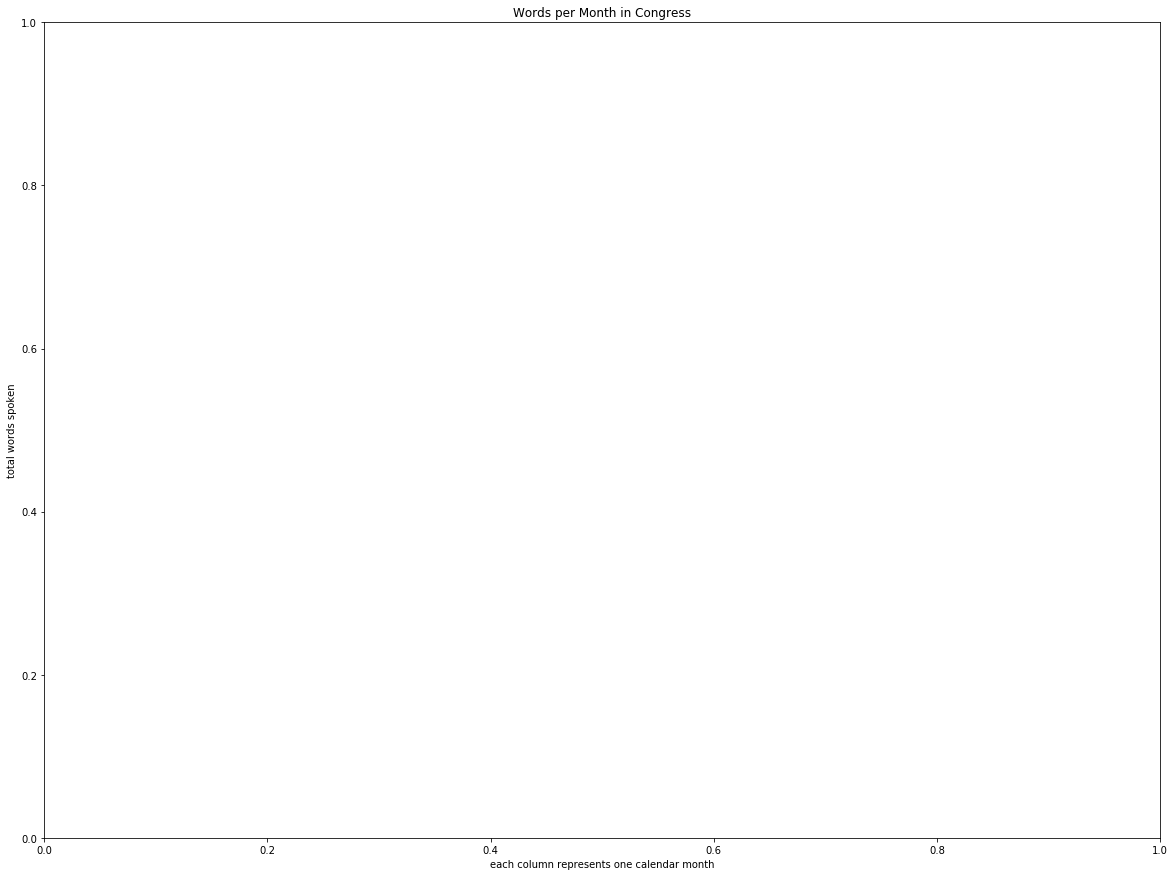

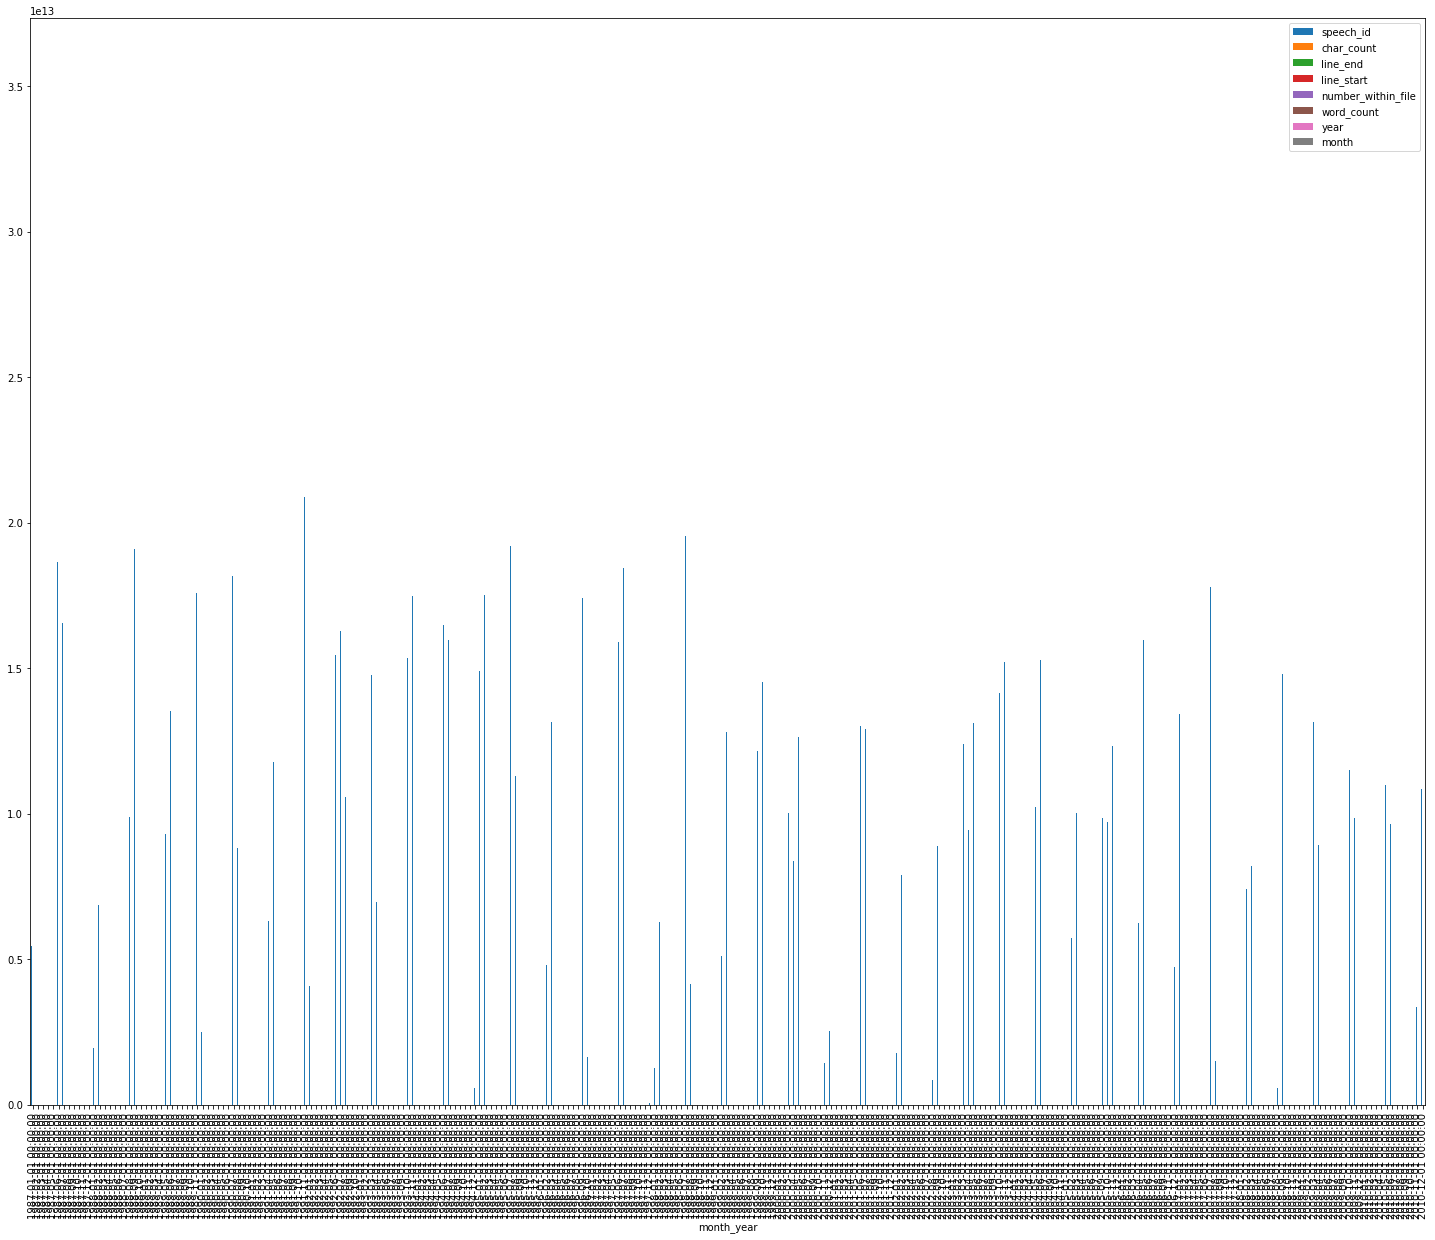

In [ ]:
plt.xlabel('each column represents one calendar month')
plt.ylabel('total words spoken')
plt.title("Words per Month in Congress")

plt.rcParams['figure.figsize'] = [25, 20]

year_counts.plot.bar()

In this representation we can see that there's a lot of variation of how much Congress spoke and when.   Notice that there's a huge amount of variation -- from almost nothing to quite a lot.  These variations can create trouble for us if we aren't careful!

## Clean the words

In [ ]:
all_data['speech'] = all_data['speech'].apply(lambda x: " ".join(x.lower() for x in x.split())) #lowercase
all_data['speech']  = all_data['speech'].str.replace('[^\w\s]','') # remove punctuation

from nltk.corpus import stopwords # stopwording
stop = stopwords.words('english')
all_data['speech']  = all_data['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
all_data.head()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Searched in:
    - '/users/sbuongiorno/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/hpc/applications/anaconda/3/nltk_data'
    - '/hpc/applications/anaconda/3/lib/nltk_data'
**********************************************************************


## Break speeches into words, get the most frequent words

In [ ]:
top_words = pd.Series(' '.join(all_data['speech']).split()).value_counts()[:10]

In [ ]:
top_words

In [ ]:
top_words2 = pd.DataFrame({'word':top_words.index, 'count':top_words.values})
top_words2

In [ ]:
top_words2['year']='1970'
top_words2

In [ ]:
# list all unique month_years
set(all_data['month_year'])

## Get the most frequent words for each month and year

To measure word count over time, we're going to create a for loop that cycles through each period ('month_year') and measures the frequency of the top 50 words in that period.  

Notice that the for loop is cycling through month_year periods and adding a new line to the dataframe word_per_year_counts with each period (m in month_year).

Notice the line pd.Series ... split().value_counts:50 -- which we just saw above.  This line tells pandas to split up the 'speech' field and measure the frequency of the words overall.  

In [ ]:
# create a dummy data frame
word_per_year_counts = pd.DataFrame() 

# the following lines essentially create word frequencies "grouped" by month_year.  We're using a for loop rather than group_by. 
for m in set(all_data['month_year']):
    freq = pd.Series(' '.join(all_data.loc[all_data['month_year'] == m, 'speech']).split()).value_counts()[:50]
    freq2 = pd.DataFrame({'word':freq.index, 'count':freq.values})
    freq2['month_year']= m
    word_per_year_counts = word_per_year_counts.append(freq2)
    
word_per_year_counts

This might take a moment depending on how many words you're counting.  You can change the "top number count" (currently [:50]) at the end of "freq -" to a larger or smaller number if you want to speed things up -- or see more words.

## Find just the top words overall -- their per-month-year counts

The dataframe word_per_year_counts contains all words over time.  But what we probably want to look at is a smaller set of words -- those could be the most prominent nouns, or a list of special words, or words ascertained by tf-idf, or any other process.  In this case, we'll go for something really simple: the top words over time.  We'll ask the question: how does their expression over time change?

Because we already have a list of the overall top words for the era -- top_words2 -- we can just write a simple loop cycling through word_per_year_counts and asking if each word appears in top_words2.

In [ ]:
set(top_words2['word'])

Now our code instructs python to cycle through the list of words in word_per_year_counts and to keep only the words that also occur in top_words2.  Can you see what the for loop is doing?

In [ ]:
top_words_over_time = pd.DataFrame()

for word in set(word_per_year_counts['word']): # cycling through the unique words in the dataframe above
    if word in set(top_words2['word']): # if the word is a top word
        top_words_over_time = top_words_over_time.append(word_per_year_counts.loc[word_per_year_counts['word'] == word]) #grab the row.
        
        
top_words_over_time

Check what we've done.  What words are in the list of top words included in our new dataframe?

In [ ]:
set(top_words_over_time['word']) # this is a list of the top words about which we have information for each month-year period

In order to graph the data-frame, we need to do a little work with the datetime package, because matplotlib likes data in the format y-m-d or d-m-y, not month_year.  So let's regularize the dates.

In [ ]:
# convert month-year back to date format for easier plotting
top_words_over_time['month_year'] =top_words_over_time.month_year.values.astype('datetime64[M]')
top_words_over_time

# Line chart with raw count

In the visualization that follows, we're going to create a scatter-plot of dots, where one dot shows how many times a word appears per month_year.  We'll color the dots a different color for each word.  Notice the plt.scatter() command, which tells matplotlib to use a scatterplot. 

Creating complex plots of this kind sometimes involves writing a for loop where we're essentially layering a new plot for each word and changing the color each time.  See if you can understand the for loop to add new colors for each individual word -- that's essentially the only new thing about this graph.

In [ ]:
%matplotlib inline

# style
plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
  
# create a color palette
palette = plt.get_cmap('Set3') # this tells matplotlib what colors to use.  you can play with this to change the colors.
 
# multiple line plot
num=0

# this is the for loop that creates multiple plots
for word in set(top_words_over_time['word']):
    num+=1 # for each new word, the counter 'num' changes 
    plt.scatter(top_words_over_time.loc[top_words_over_time['word'] == word, 'month_year'], # x axis 
             top_words_over_time.loc[top_words_over_time['word'] == word, 'count'],  # y axis
             color=palette(num), linewidth=1, alpha=0.7, label=word) # num tells the plot to choose a different color this time

# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Top Words Over Time", loc='left', fontsize=30, fontweight=0, color='Red')
plt.xlabel("Time")
plt.ylabel("Wordcount")

plt.show()


We have a good representation of wordcount here.  Although I want to emphasize that we are, technically, *doing everything wrong*.  It is almost never the case that the most frequent words are the most interesting.  The list of words that we've plotted here is pretty dull.  It also exemplifies very little change over time, because the same words are used all the time in Congress to talk about the fact that Congress is a Congress.  

That's why, in your assignment, you'll be looking not at the most frequent words, but at a list of special words, carefully honed through many conversations. We could also use some of the other tactics we've used -- for instance, tf-idf or log likelihood to identify the favorite words of the 5 most prevalent speakers -- to generate some other words to follow over time.  Maybe you will pursue such strategies in your final project.  

There's another problem too, however.  The numbers in this chart are deceptive; if we were measuring them over decades ,they would be even more problematic.  There's just a lot of noise -- look at all those colors jumbled together.  This is an excellent case for using _averages_ over time -- moving from month to year -- and _proportions_ -- measuring word count against how many words were spoken in a period.  

We won't take any more averages right now -- although above, when we "groupby" month_year and then take the sum for that period, you could easily switch in year for month_year and/or "mean" for "sum," and play with what would happen then.  

Instead, we'll look at taking wordcounts as a proportion rather than a raw count.  Above, where we counted the number of words per date, we saw that there was a huge variation in words spoken per day.  The numbers we've charted per word are meaningless without some sense of how they represent other variations in speaking.  

One of the great tools for measuring change over time is to "normalize" word counts.  Simply put, we take the ratio: number of times the word "bill" appears vs number of words spoken in that period.

# Get proportions

The per-period-per-word counts and per-period-overall counts live in different places.  Look at them:

In [ ]:
word_per_year_counts

In [ ]:
year_counts.head()

To put the two dataframes together, we need to perform a merge -- technically an "inner join."  You can picture an inner join like the area at the center of a venn diagram: in this case, both dataframes share the column month_year.  So we can tell python to paste them together using month_year.

In [ ]:
word_proportions = pd.merge(year_counts, word_per_year_counts,how='inner', left_on='month_year', right_on='month_year')

word_proportions.head()

Now that we have the count of each word ("count") in the same dataframe as the count of all words per month_year ("word_count"), we can find out what proportion of speech per month_year is represented by each word.

In [ ]:
word_proportions['proportion'] = word_proportions['count']/word_proportions['word_count']
word_proportions

Notice that the numbers in the "proportion" column are really small.  They represent proportions: all the counts for every word in 2007-01 would add up to 1.  We can represent them as percentages: "speaker" appears 3.14% of the time.  Knowing what the proportion means and talking about it accurately is an important part of doing data science correctly.  
Understanding proportion also means that we will take steps to make sure that any graph based on proportions represents those measures as percentages and labels them correctly.

We're getting close.  But now we need to filter the databas for top words.  The dataframe word_proportions currently contains the measures of the top 50 words for each period.  We only want measures over time of only the ten top words, contained in top_words2.  Do you remember how we filter for those words?

In [ ]:
top_words_over_time_proportion = pd.DataFrame()

for word in set(word_proportions['word']): # cycling through the unique words in the dataframe above
    if word in set(top_words2['word']): # if the word is a top word
        top_words_over_time_proportion = top_words_over_time_proportion.append(word_proportions.loc[word_proportions['word'] == word]) #grab the row.
        
        
top_words_over_time_proportion

## Line chart with proportions

There are only a few ways that the proportion chart differs from the raw count chart.  Can you find them all?

In [ ]:
# convert month-year back to date format for easier plotting
top_words_over_time_proportion['month_year'] =top_words_over_time_proportion.month_year.values.astype('datetime64[M]')
top_words_over_time_proportion

In [ ]:
plt.clf() # <-- clears out the earlier plot

%matplotlib inline
import matplotlib.ticker as ticker # <--- notice that we're importing a new ticker function 

# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set3')
 
# multiple line plot
num=0


for word in set(top_words_over_time_proportion['word']):
    num+=1
    plt.scatter(top_words_over_time_proportion.loc[top_words_over_time_proportion['word'] == word, 'month_year'], # x axis 
             top_words_over_time_proportion.loc[top_words_over_time_proportion['word'] == word, 'proportion'],  # y axis
             color=palette(num), linewidth=1, alpha=0.5, label=word)

# Add legend
plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Top Words Over Time by Proportion", loc='left', fontsize=30, fontweight=0, color='red')
plt.xlabel("Time")
plt.ylabel("Proportion") # <--- Notice that I've re-labeled the title and y-axis
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter()) # <--- This tells matplotlib that we're dealing with percentages
#plt.tick_params(axis='both',labelsize=14)

plt.show()


Notice that there's appears to be a much narrower range of variation in the Proportion plot over the Raw Count plot.  A few words' variation may stand out (depending on what time range you're looking at) -- "president" and "bill" stand out for me, for instance -- as having greater variation than the other words, which mostly stay the same.  The outliers give us an important clue about historical change: something was going on with "bills"!  

If we were writing a paper about this data, we would know to follow the data into the use of "bills" in September 2010 to figure out why so many bills were being talked about relative to the normal distribution of that word.  That knowledge -- in turn -- would help us to answer the historical question: what was changing about debates in Congress during this time? 

We can learn from this exercise how important it is to "normalize" the data by treating word counts as a percentage of a changing number of words spoken over time.  Don't forget to normalize the wordcounts in your data challenges!

# Group Assignment

In the instructions above, you learned how to round dates, extract months and years, and plot information over time.  Now you will put to use what you learned in a short module that asks you to plot word count over time.

* First, I'd like your group to use each member's list of "special words" (from previous weeks), plotting those words and their word-counts over time to figure out which words exhibit the greatest change.  You should have two or three visualizations based on two or three lists of words generated by your group.  

* Think about what each visualization tells you in light of Fischer's injunction to answer a "question" about history.  Choose the visualization that you think best answers a historical question, and decide what question you're answering.  Write out the question; it is your first heading.  

* Now revisit the visualization in question, re-plotting that visualization with information about specific dates, or rounding wordcounts to years or decades.  Select the view that you think is most useful. Label the plot so that readers can tell what's going on with the plot. 

* Now, write a paragraph explaining what the timeline shows.  Label this paragraph with your question.  Embed the visualization in the document, labeling it "Figure 1," and referring to Figure 1 in your text.

* Next, consider how Prof. Guldi reflected on how slight changes to a word list can produce a very different portrait of time in her article, 'Critical Search.' https://culturalanalytics.org/article/11028-critical-search-a-procedure-for-guided-reading-in-large-scale-textual-corpora (see the first two visualizations).  Dr. Guldi used the _Oxford English Dictionary_ -- a pay-walled resource for scholars -- to enhance the rigor and number of the special words she used in her study.  The SMU link to the OED is here: https://blog.smu.edu/smulibraries/2015/03/26/featured-resource-oxford-english-dictionary/.  Can you use the OED to expand and narrow your list of special words?  Would expanding or refining your list of words help you to answer your historical question more precisely?   

* Make a new list of special words, focused on your historical question, using the OED.  Take the word counts and plot them over time.  Write a paragraph with the visualization embedded (as Figure 2), explaining what the timeline shows.  Label this paragraph as "Historical Question Revisited, with OED Data"

* Now write a paragraph comparing Figures 1 and 2 and what they show about change over time in your corpus.  Label this paragraph, "Comparing Two Lenses on Time."

The output of this process will be two visualizations and three paragraphs.  Please submit it via Canvas.  